# SANS simulations

Choosing an experimental reference frame with the beam incoming aligned and polarised along the $z$ direction, the non-polarised SANS cross section is 
\begin{equation} \label{eq:C7:SANS}
    \frac{d\Sigma}{d\Omega} \propto \left\lVert \widetilde{M}_x \right\rVert + \left\lVert \widetilde{M}_y \right\rVert .
\end{equation}

### Importing Packages

In [1]:
import oommfc as oc
import discretisedfield as df
import micromagneticmodel as mm
import numpy as np
import ubermagutil.units as uu
import matplotlib.pyplot as plt
import mag2exp

In [126]:
    region = df.Region(p1=(-50e-9, -50e-9, -50e-9), p2=(50e-9, 50e-9, 50e-9))
    mesh = df.Mesh(region=region, cell=(5e-9, 5e-9, 5e-9))
    Ms = 1.1e6
    qy = 20e-9

    def m_fun(pos):
        x, y, z = pos
        return [Ms*np.cos(2*np.pi*y/qy), Ms*np.sin(2*np.pi*y/qy), 0]

    m = df.Field(mesh, dim=3, value=m_fun)
    cf = mag2exp.sans.chiral_function(m, geometry='perpendicular')
    idx = np.unravel_index(cf.array.argmax(), cf.array.shape)[0:3]
    q = cf.mesh.index2point(idx)[1]
    assert np.isclose(q, 1/qy)
    peaks = (cf.imag.array > 400).sum()
    assert peaks == 1
    idx = np.unravel_index(cf.array.argmin(), cf.array.shape)[0:3]
    q = cf.mesh.index2point(idx)[1]
    assert np.isclose(q, -1/qy)
    peaks = (cf.imag.array < -400).sum()
    assert peaks == 1

    def m_fun(pos):
        x, y, z = pos
        return [Ms*np.cos(2*np.pi*y/qy), 0, Ms*np.sin(2*np.pi*y/qy)]

    m = df.Field(mesh, dim=3, value=m_fun)
    cf = mag2exp.sans.chiral_function(m, geometry='perpendicular')
    assert np.isclose(cf.array, 0).all()

In [125]:
def m_fun(pos):
    x, y, z = pos
    return [Ms*np.cos(2*np.pi*y/qy), Ms*np.sin(2*np.pi*y/qy), 0]

m = df.Field(mesh, dim=3, value=m_fun)
cf = mag2exp.sans.chiral_function(m, geometry='perpendicular')
idx = np.unravel_index(cf.array.argmax(), cf.array.shape)[0:3]
q = cf.mesh.index2point(idx)[1]
assert np.isclose(q, 1/qy)
peaks = (cf.imag.array > 400).sum()
assert peaks == 1
idx = np.unravel_index(cf.array.argmin(), cf.array.shape)[0:3]
q = cf.mesh.index2point(idx)[1]
assert np.isclose(q, -1/qy)
peaks = (cf.imag.array < -400).sum()
assert peaks == 1

In [121]:
(cf.array > 400).sum()

0

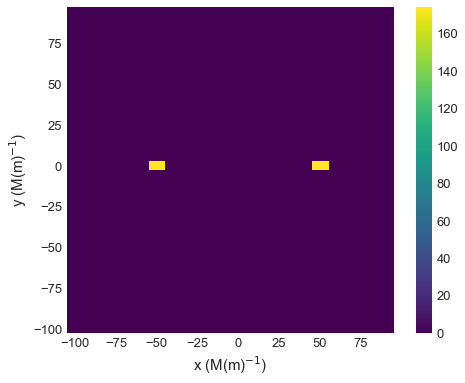

In [98]:
sans = mag2exp.sans.cross_section(m, geometry='parallel', method='np')
sans.real.mpl.scalar()

In [47]:
np.isclose(sans.array, 0).all()

True

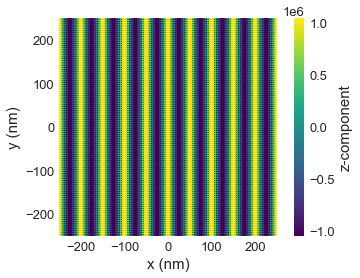

In [17]:
%matplotlib inline
import oommfc as oc
import discretisedfield as df
import micromagneticmodel as mm
import numpy as np
import ubermagutil.units as uu
import matplotlib.pyplot as plt

np.random.seed(1)

region = df.Region(p1=(-250e-9, -250e-9, 0), p2=(250e-9, 250e-9, 20e-9))
mesh = df.Mesh(region=region, cell=(5e-9, 5e-9, 5e-9))

system = mm.System(name='Box2')

system.energy = (mm.Exchange(A=1.6e-11)
                 + mm.DMI(D=4e-3, crystalclass='T') 
                 #+ mm.UniaxialAnisotropy(K=0.51e6, u=(0, 0, 1)) 
                 #+ mm.Demag()
                 + mm.Zeeman(H=(0, 0, 2e5)))

Ms = 1.1e6

def m_fun(pos):
    return 2 * np.random.rand(3) - 1

def m_fun2(pos):
    x, y, z =pos
    qx = 50e-9
    qy = 100e-9
    qz = 150e-9
    return (np.sin(2*np.pi*x/qx), 0, np.cos(2*np.pi*x/qx))

# create system with above geometry and initial magnetisation
system.m = df.Field(mesh, dim=3, value=m_fun2, norm=Ms)
system.m.plane('z').mpl()

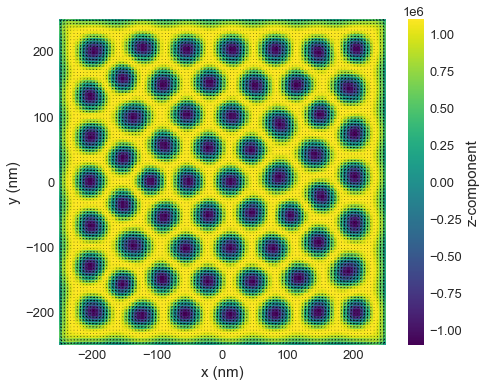

In [3]:
system.m.plane('z').mpl()

In [18]:
import mag2exp

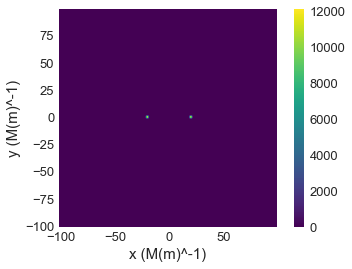

In [30]:
mag2exp.sans.cross_section(system.m, method='unpol', geometry='parallel').real.mpl()

In [47]:
m_p_ft = (system.m * df.dz).integral(direction='z').fft2
theta = df.Field(m_p_ft.mesh, dim=1, value=lambda x: np.arctan2(x[1],x[0]))

q = df.Field(m_p_ft.mesh, dim=2, value=lambda x: [x[0],x[1]] / np.linalg.norm([x[0],x[1]]))

ValueError: Cannot normalise field with zero values.

In [46]:
abs((q.x*q.y).array - np.cos(theta.array)*np.sin(theta.array)).all() < 1e-5

True

In [42]:
np.cos(theta.array)*np.sin(theta.array)

array([[[[ 0.5       ]],

        [[ 0.49989798]],

        [[ 0.49958368]],

        ...,

        [[-0.49904438]],

        [[-0.49958368]],

        [[-0.49989798]]],


       [[[ 0.49989798]],

        [[ 0.5       ]],

        [[ 0.49989373]],

        ...,

        [[-0.49956616]],

        [[-0.49989373]],

        [[-0.5       ]]],


       [[[ 0.49958368]],

        [[ 0.49989373]],

        [[ 0.5       ]],

        ...,

        [[-0.49988921]],

        [[-0.5       ]],

        [[-0.49989373]]],


       ...,


       [[[-0.49904438]],

        [[-0.49956616]],

        [[-0.49988921]],

        ...,

        [[ 0.5       ]],

        [[ 0.49988921]],

        [[ 0.49956616]]],


       [[[-0.49958368]],

        [[-0.49989373]],

        [[-0.5       ]],

        ...,

        [[ 0.49988921]],

        [[ 0.5       ]],

        [[ 0.49989373]]],


       [[[-0.49989798]],

        [[-0.5       ]],

        [[-0.49989373]],

        ...,

        [[ 0.49956616]],

        

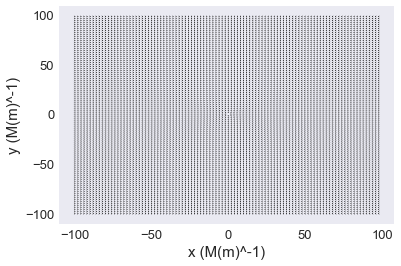

In [41]:
q.mpl_vector(use_color=False)

${\bf Q} = {\bf q} \times \left[ {\bf q} \times \widetilde{\bf M} \right]$

In [ ]:
m_fft3 = system.m.fft3.plane(z=0)
def q_val(pos):
    x, y, z = pos
    return (0, y, z)
q = df.Field(m_fft3.mesh, dim=3, value=q_val, norm=1)

In [ ]:
sv = q & (q & m_fft3)
sv = (sv * df.dz)

In [ ]:
nsf = (sv.z*sv.z.conjugate)

In [ ]:
spc1 = (sv.x*sv.x.conjugate) + (sv.y*sv.y.conjugate) - 1j * (sv.x*sv.y.conjugate - sv.x.conjugate*sv.y) 
spc2 = (sv.x*sv.x.conjugate) + (sv.y*sv.y.conjugate) + 1j * (sv.x*sv.y.conjugate - sv.x.conjugate*sv.y) 

In [ ]:
spc1.real.mpl()

In [ ]:
(spc1+spc2+nsf+nsf).real.mpl()

In [ ]:
(sv * df.dz).integral(direction='z').z.real.mpl()

In [ ]:
sv.z.plane(z=0).real.mpl()

In [ ]:
m_p_ft = (system.m * df.dz).integral(direction='z').fft2

In [ ]:
m_p = system.m.integral(direction='z')

sans = (m_p.x.fft2*m_p.x.fft2.conjugate + m_p.y.fft2*m_p.y.fft2.conjugate).real

In [ ]:
sans.mpl_scalar(cmap='gray',
         interpolation='spline16',
         colorbar_label=r'Intensity (arb.)')

SANS can have other geometries and polarisation of neutrons that I am planning to add. I just need to get my head around the differnt geometries.

\begin{align}
    {\bf Q} &= {\bf q} \times \left[ {\bf q} \times \widetilde{\bf M} \right] \\
    {\bf Q}_{\perp} &= \begin{pmatrix} 
                        -\widetilde{\bf M}_x \\
                        -\widetilde{\bf M}_y \cos^2\theta + \widetilde{\bf M}_z \sin\theta\cos\theta \\
                        \widetilde{\bf M}_y \sin\theta\cos\theta -\widetilde{\bf M}_z \sin2\theta
                       \end{pmatrix}  \\
    {\bf Q}_{\parallel } &= \begin{pmatrix} 
                             -\widetilde{\bf M}_x \sin^2\theta + \widetilde{\bf M}_y \sin\theta\cos\theta \\
                             \widetilde{\bf M}_x \sin\theta\cos\theta - \widetilde{\bf M}_y \cos^2\theta  \\
                             -\widetilde{\bf M}_z
                            \end{pmatrix} 
\end{align}
${\bf q}$ is the unit momentum transfer vector.

\begin{align}
    \frac{d\sum^{\pm \pm}}{d\Omega} &\sim |{\bf Q}_z|^2 \\
    \frac{d\sum^{\pm \mp}}{d\Omega} &\sim |{\bf Q}_x|^2 + |{\bf Q}_y|^2 \mp 
        i\left( {\bf Q}_x {\bf Q}^{\ast}_y - {\bf Q}^{\ast}_x {\bf Q}_y \right)
\end{align}
And

\begin{align}
    \frac{d\sum^{+}}{d\Omega} &= \frac{d\sum^{++}}{d\Omega} + \frac{d\sum^{+-}}{d\Omega} \\
    \frac{d\sum^{-}}{d\Omega} &= \frac{d\sum^{--}}{d\Omega} + \frac{d\sum^{-+}}{d\Omega} \\
    \frac{d\sum}{d\Omega} &= \frac{1}{2} \left( \frac{d\sum^{+}}{d\Omega} + \frac{d\sum^{-}}{d\Omega} \right) \\
    \frac{d\sum}{d\Omega} &= \frac{1}{2} \left( \frac{d\sum^{++}}{d\Omega} + \frac{d\sum^{+-}}{d\Omega} + 
                            \frac{d\sum^{--}}{d\Omega} + \frac{d\sum^{-+}}{d\Omega} \right)
\end{align}

In [ ]:
import mag2exp

In [ ]:
sans1 = mag2exp.sans.cross_section(system.m, method='unpolarised', geometry='perpendicular')

In [ ]:
sans2 = mag2exp.sans.cross_section(system.m, method='unpol', geometry='perpendicular')
fig, ax = plt.subplots(figsize=(8,8))
sans2.real.mpl_scalar(ax=ax, cmap='gray',
         interpolation='spline16',
         colorbar_label=r'Intensity (arb.)')

In [ ]:
kx=ky=0.1
m_p_ft = (system.m * df.dz).integral(direction='z').fft2
k = df.Field(m_p_ft.mesh, dim=3, value=lambda x: x)
denom = (k.x**2 + k.y**2) / (k.x**2 + k.y**2
                                 + k.mesh.dx**2*kx**2 + k.mesh.dy**2*ky**2)**2
theta = np.arctan2(k.y.array.squeeze(), k.x.array.squeeze())

In [ ]:
plt.imshow(theta.T, origin='lower')
plt.colorbar()

In [ ]:
theta = theta[...,np.newaxis,np.newaxis]

In [ ]:
volume = system.m.mesh.region.edges[0]*system.m.mesh.region.edges[1]*system.m.mesh.region.edges[2]

In [ ]:
volume

In [ ]:
b_H = 2.91e8 
K = 8 * np.pi**3 * b_H**2 / volume

In [ ]:
K

In [ ]:
def sans_polarised_pp(Q):
    return Q.z*Q.z.conjugate

def sans_polarised_nn(Q):
    return Q.z*Q.z.conjugate

def sans_polarised_pn(Q):
    return (Q.x*Q.x.conjugate + Q.y*Q.y.conjugate - 1j * (Q.x*Q.y.conjugate - Q.x.conjugate*Q.y))

def sans_polarised_np(Q):
    return (Q.x*Q.x.conjugate + Q.y*Q.y.conjugate + 1j * (Q.x*Q.y.conjugate - Q.x.conjugate*Q.y))

def sans_half_polarised_p(Q):
    return sans_polarised_pp(Q) + sans_polarised_pn(Q)

def sans_half_polarised_n(Q):
    return sans_polarised_nn(Q) + sans_polarised_np(Q)

def sans_unpolarised(Q):
    return 0.5*(sans_half_polarised_p(Q) + sans_half_polarised_n(Q))

def chiral_function(Q):
    return (sans_polarised_pn(Q) - sans_polarised_np(Q)) / (-2 * 1j)

In [ ]:
Q_perp = (-m_p_ft.x << 
              -m_p_ft.y*np.cos(theta)**2 + m_p_ft.z*np.cos(theta)*np.sin(theta) << 
               m_p_ft.y*np.cos(theta)*np.sin(theta) - m_p_ft.z*np.sin(theta)**2)

In [ ]:
sans1 = K*sans_unpolarised(Q_perp)
sans1.real.mpl_scalar(cmap='gray',
         interpolation='spline16',
         colorbar_label=r'Intensity (arb.)')

In [ ]:
system.m.integral(direction='z').mpl()

In [ ]:
(system.m * df.dz).integral(direction='z').mpl()

In [ ]:
def sans_Q_perp(field, theta):
    m_p_ft = field.integral(direction='z').fft2
    Q_perp = (-m_p_ft.x << 
              -m_p_ft.y*np.cos(theta)**2 + m_p_ft.z*np.cos(theta)*np.sin(theta) << 
               m_p_ft.y*np.cos(theta)*np.sin(theta) - m_p_ft.z*np.sin(theta)**2)
    return Q_perp

def sans_Q_parallel(field, theta):
    m_p_ft = field.integral(direction='z').fft2
    Q_parallel = (-m_p_ft.x*np.sin(theta)**2 + m_p_ft.y*np.cos(theta)*np.sin(theta) << 
                  -m_p_ft.y*np.cos(theta)**2 + m_p_ft.x*np.cos(theta)*np.sin(theta) << 
                  m_p_ft.z)
    return Q_parallel

def sans_polarised_pp(Q):
    return Q.z*Q.z.conjugate

def sans_polarised_nn(Q):
    return Q.z*Q.z.conjugate

def sans_polarised_pn(Q):
    return (Q.x*Q.x.conjugate + Q.y*Q.y.conjugate - 1j * (Q.x*Q.y.conjugate - Q.x.conjugate*Q.y))

def sans_polarised_np(Q):
    return (Q.x*Q.x.conjugate + Q.y*Q.y.conjugate + 1j * (Q.x*Q.y.conjugate - Q.x.conjugate*Q.y))

def sans_half_polarised_p(Q):
    return sans_polarised_pp(Q) + sans_polarised_pn(Q)

def sans_half_polarised_n(Q):
    return sans_polarised_nn(Q) + sans_polarised_np(Q)

def sans_unpolarised(Q):
    return 0.5*(sans_half_polarised_p(Q) + sans_half_polarised_n(Q))

def chiral_function(Q):
    return (sans_polarised_pn(Q) - sans_polarised_np(Q)) / (-2 * 1j)

In [ ]:
cf = mag2exp.sans.chiral_function(system.m, geometry='parallel', theta=np.pi/2)
cf.imag.mpl_scalar()

In [ ]:
theta = 0
m_p_ft = m_p.fft2
chiral_f = (m_p_ft.x*m_p_ft.y.conjugate - m_p_ft.x.conjugate*m_p_ft.y) * np.cos(theta)**2
chiral_f += -(m_p_ft.x*m_p_ft.z.conjugate - m_p_ft.x.conjugate*m_p_ft.z) * np.cos(theta) * np.sin(theta)

chiral_f.imag.mpl_scalar()

In [ ]:
cf2a = mag2exp.sans.cross_section(system.m, method='pn', geometry='perpendicular')
cf2b = mag2exp.sans.cross_section(system.m, method='np', geometry='perpendicular')
cf2 = (cf2a-cf2b)/(-2 *1j)
cf2.imag.mpl_scalar()

In [ ]:
Q = mag2exp.sans.magnetic_interaction_vector(system.m, geometry='perpendicular')

In [ ]:
sans1.real.mpl_scalar()

In [ ]:
theta = 0#np.pi/2
Q = sans_Q_perp(system.m, theta)
sans_unpolarised(Q).real.mpl_scalar()

In [ ]:
sans_polarised_pp(system.m, theta, geometry='perp')

In [ ]:
theta = 0#p.pi/2

m_p_ft = m_p.fft2
Q_perp = (-m_p_ft.x << 
          -m_p_ft.y*np.cos(theta)**2 + m_p_ft.z*np.cos(theta)*np.sin(theta) << 
          m_p_ft.y*np.cos(theta)*np.sin(theta) - m_p_ft.z*np.sin(theta)**2)

Q_para = (-m_p_ft.x*np.sin(theta)**2 + m_p_ft.y*np.cos(theta)*np.sin(theta) << 
          -m_p_ft.y*np.cos(theta)**2 + m_p_ft.x*np.cos(theta)*np.sin(theta) << 
          m_p_ft.z)

In [ ]:
cross_perp_pp = Q_perp.z*Q_perp.z.conjugate
cross_perp_nn = Q_perp.z*Q_perp.z.conjugate
cross_perp_pn = (Q_perp.x*Q_perp.x.conjugate + Q_perp.y*Q_perp.y.conjugate + 
            1j * (Q_perp.x*Q_perp.y.conjugate - Q_perp.x.conjugate*Q_perp.y))
cross_perp_np = (Q_perp.x*Q_perp.x.conjugate + Q_perp.y*Q_perp.y.conjugate - 
            1j * (Q_perp.x*Q_perp.y.conjugate - Q_perp.x.conjugate*Q_perp.y))

In [ ]:
p=1/2
sf=1
cross_perp_sanspol = (cross_perp_pp +
                      Q_perp.x*Q_perp.x.conjugate + Q_perp.y*Q_perp.y.conjugate + 
                      1j * (Q_perp.x*Q_perp.y.conjugate - Q_perp.x.conjugate*Q_perp.y) *
                      (2*p-1) * (2*sf-1))

In [ ]:
cross_perp_sanspol.real.mpl()

In [ ]:
cross_perp_pn.real.mpl()

In [ ]:
t_sans = 0.5 * (cross_pp + cross_pn + cross_np + cross_nn)

In [ ]:
t_sans.real.mpl_scalar(cmap='gray', interpolation='spline16', colorbar_label=r'Intensity (arb.)')

In [ ]:
(cross_perp_pn-cross_perp_np).real.mpl_scalar()

In [ ]:
((t_sans-sans)/sans).real.mpl()

In [ ]:
cross_perp_pp.real.mpl()